In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Part A

In [33]:
N = 10000 
money = 100  
T = 1000    
outcomes = np.random.choice([-1, 1], size=(N, T)) 

# Part B 

In [34]:
balance = np.hstack([np.full((N, 1), money), money + np.cumsum(outcomes, axis=1)])

# Part C

In [35]:
mask = balance > 0         
fz = np.argmax(~mask, axis=1)

nz = (~mask).any(axis=1) == False

fz[nz] = T+1

cols = np.arange(T+1)
keep = cols < fz[:, None]

final_balance = balance * keep


# Part D: Visualisation

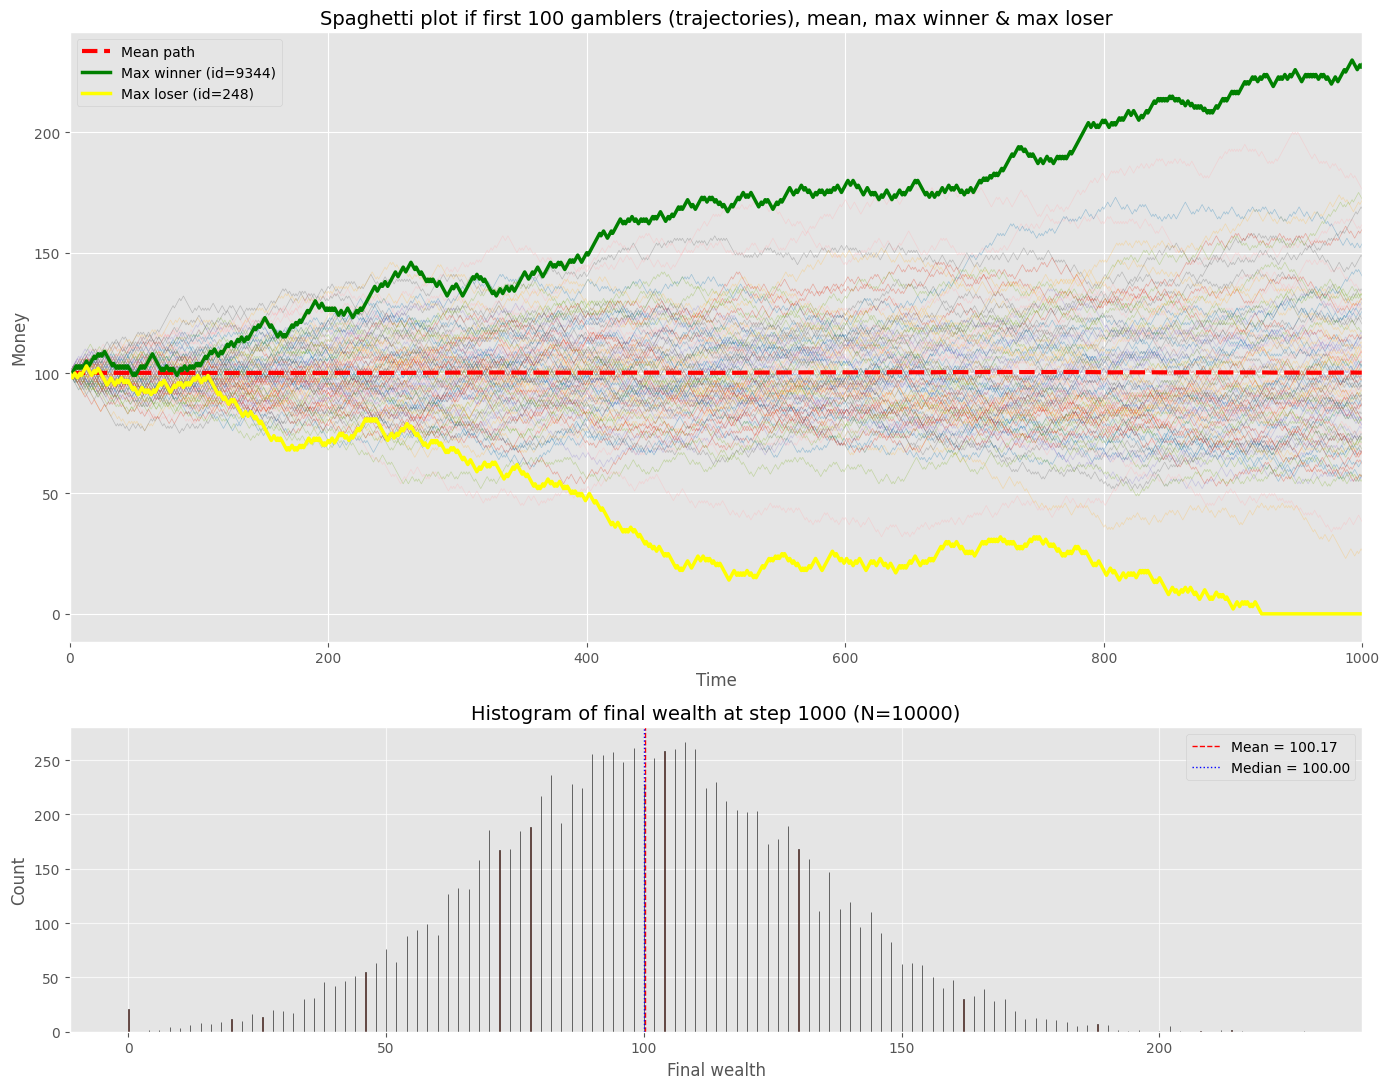

In [39]:
t = np.arange(T+1)                    
first_100 = final_balance[:100]              
mean = final_balance.mean(axis=0)     
final_money = final_balance[:, -1]
 
max_idx = np.argmax(final_money)
min_idx = np.argmin(final_money)

plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 11), gridspec_kw={'height_ratios':[2,1]})

for path in first_100:
    ax1.plot(t, path, linewidth=0.5, alpha=0.4)


ax1.plot(t, mean, color='red', linestyle='--', linewidth=3, label='Mean path')


ax1.plot(t, final_balance[max_idx], color='green', linewidth=2.5, label=f'Max winner (id={max_idx})')
ax1.plot(t, final_balance[min_idx], color='yellow', linewidth=2.5, label=f'Max loser (id={min_idx})')

ax1.set_title('Spaghetti plot if first 100 gamblers (trajectories), mean, max winner & max loser', fontsize=14)
ax1.set_xlabel('Time')
ax1.set_ylabel('Money')
ax1.legend(loc='upper left', fontsize=10)
ax1.set_xlim(0, T)


ax2.hist(final_money, bins=10000, edgecolor='k', alpha=0.8)   

mean_final = final_money.mean()
median_final = np.median(final_money)


ax2.axvline(mean_final, color='red', linestyle='--', linewidth=1, label=f'Mean = {mean_final:.2f}')
ax2.axvline(median_final, color='blue', linestyle=':', linewidth=1, label=f'Median = {median_final:.2f}')

ax2.set_title(f'Histogram of final wealth at step {Tplus1-1} (N={N})', fontsize=14)
ax2.set_xlabel('Final wealth')
ax2.set_ylabel('Count')
ax2.legend()
ax2.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()

# Part E: Analysis

Let random variable denoting profit for flip i be $x_i$. We know that $\mu = E[x_i] = 0$ and $\sigma^2 = var(x_i) = 1$. Let $S_n$ denotes the net profit after $n$ flips, i.e., $$S_n = \sum_{i=1}^n x_i$$
By central limit theorem, we know that $\frac{S_n - \mu n}{\sigma \sqrt{n}}$ converges in distribution to gaussian distribution with mean 0 and variance 1, i.e., 
$$\frac{S_n - \mu n}{\sigma \sqrt{n}} \xrightarrow{i.d.}{} \mathcal{N}(0,1)$$
So here,
$$\frac{S_n}{100} \xrightarrow{i.d.}{} \mathcal{N}(0,1)$$
$$\implies S_n \xrightarrow{i.d.}{} 100 \times \mathcal{N}(0,1)$$
and as the initial wealth was 100$,
$$\implies \text{Final Wealth} \xrightarrow{i.d.}{} 100 \times\mathcal{N}(100,1)$$

Hence, the spread in the final wealth is justified.